<a href="https://colab.research.google.com/github/benard3360-star/hello-world/blob/main/Waze_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the Waze dataset

In [3]:
data = pd.read_csv("waze_dataset.csv")
data.head(n=3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android


Let's now examine the dataset **shape**

In [5]:
data.shape

(14999, 13)

List the dataset columns

In [6]:
data.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

Show the Statistical description of the dataset columns

In [7]:
data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Show the data types of each column

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [19]:
# By applying attribute, show from 1st to 3rd rows (ID 0-2)
# You can use either iloc or loc
data.iloc[0:3]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,1,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0
1,1,1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1
2,2,1,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0


Show the number of null values in each column

In [10]:
data.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

<h2><b> Data Preprocesing</b></h2>

Handle missing values, Encode the categorical variables and prepare the features and target variables

In [15]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values in 'label' column
data['label'] = data['label'].fillna('unknown')

# Encode categorical variables
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['device'] = label_encoder.fit_transform(data['device'])

# Select relevant features
features = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
            'total_navigations_fav1', 'total_navigations_fav2',
            'driven_km_drives','duration_minutes_drives', 'activity_days',
            'driving_days', 'device']

# Prepare feature matrix X
X =data[features]

In [23]:

# Exclude non-numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numeric columns only
correlation_matrix = data[numeric_columns].corr()

# Display all correlations as a string
print(correlation_matrix.to_string())

                               ID     label  sessions    drives  total_sessions  n_days_after_onboarding  total_navigations_fav1  total_navigations_fav2  driven_km_drives  duration_minutes_drives  activity_days  driving_days    device
ID                       1.000000 -0.006243  0.011240  0.010470        0.002909                -0.005673               -0.000606               -0.000771         -0.003561                -0.001594      -0.001887     -0.001808 -0.011270
label                   -0.006243  1.000000 -0.030624 -0.030381       -0.012664                 0.100137               -0.047402               -0.014391         -0.020566                -0.034604       0.245151      0.238593 -0.004374
sessions                 0.011240 -0.030624  1.000000  0.996822        0.589079                 0.005676                0.005713                0.006185          0.002113                -0.006113       0.024194      0.018973  0.012443
drives                   0.010470 -0.030381  0.996822  1.000

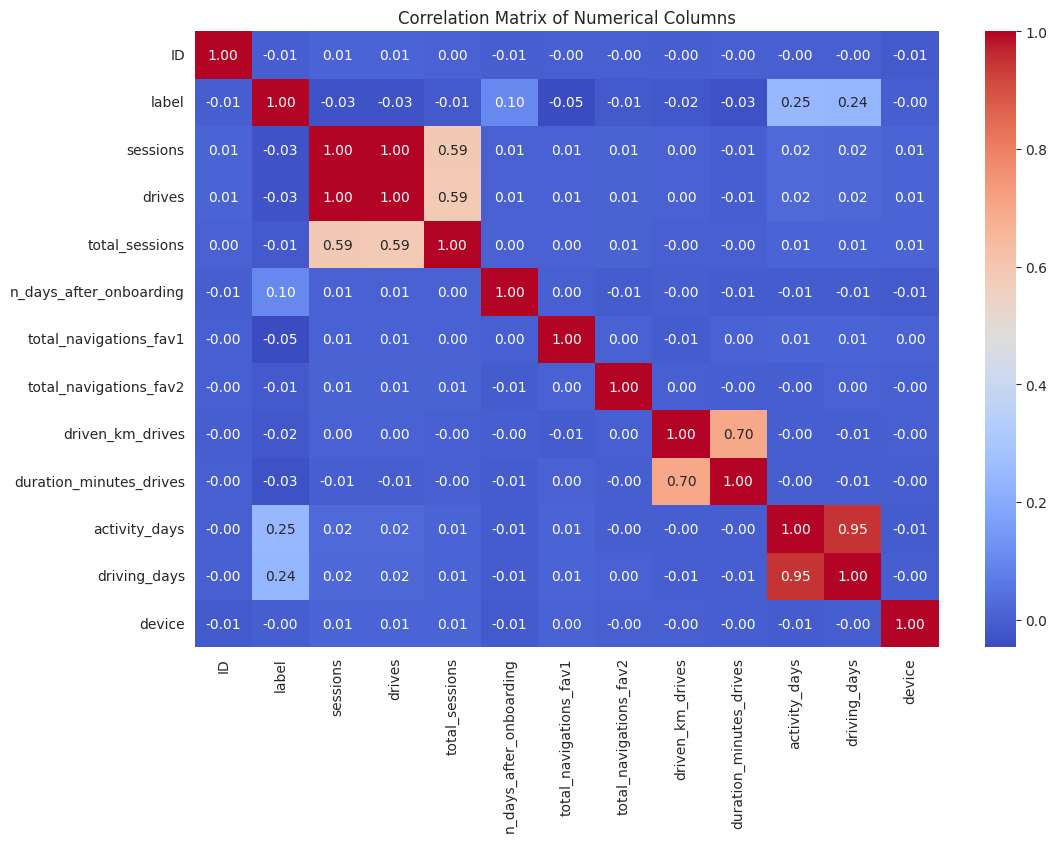

In [24]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Correlation matrix of numerical columns
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### <b>Correlation Analysis</b>

The heatmap shows the correlations between different features and the target variable (label).

Features such as sessions, drives, total_sessions, driven_km_drives, and duration_minutes_drives have higher positive correlations with label.

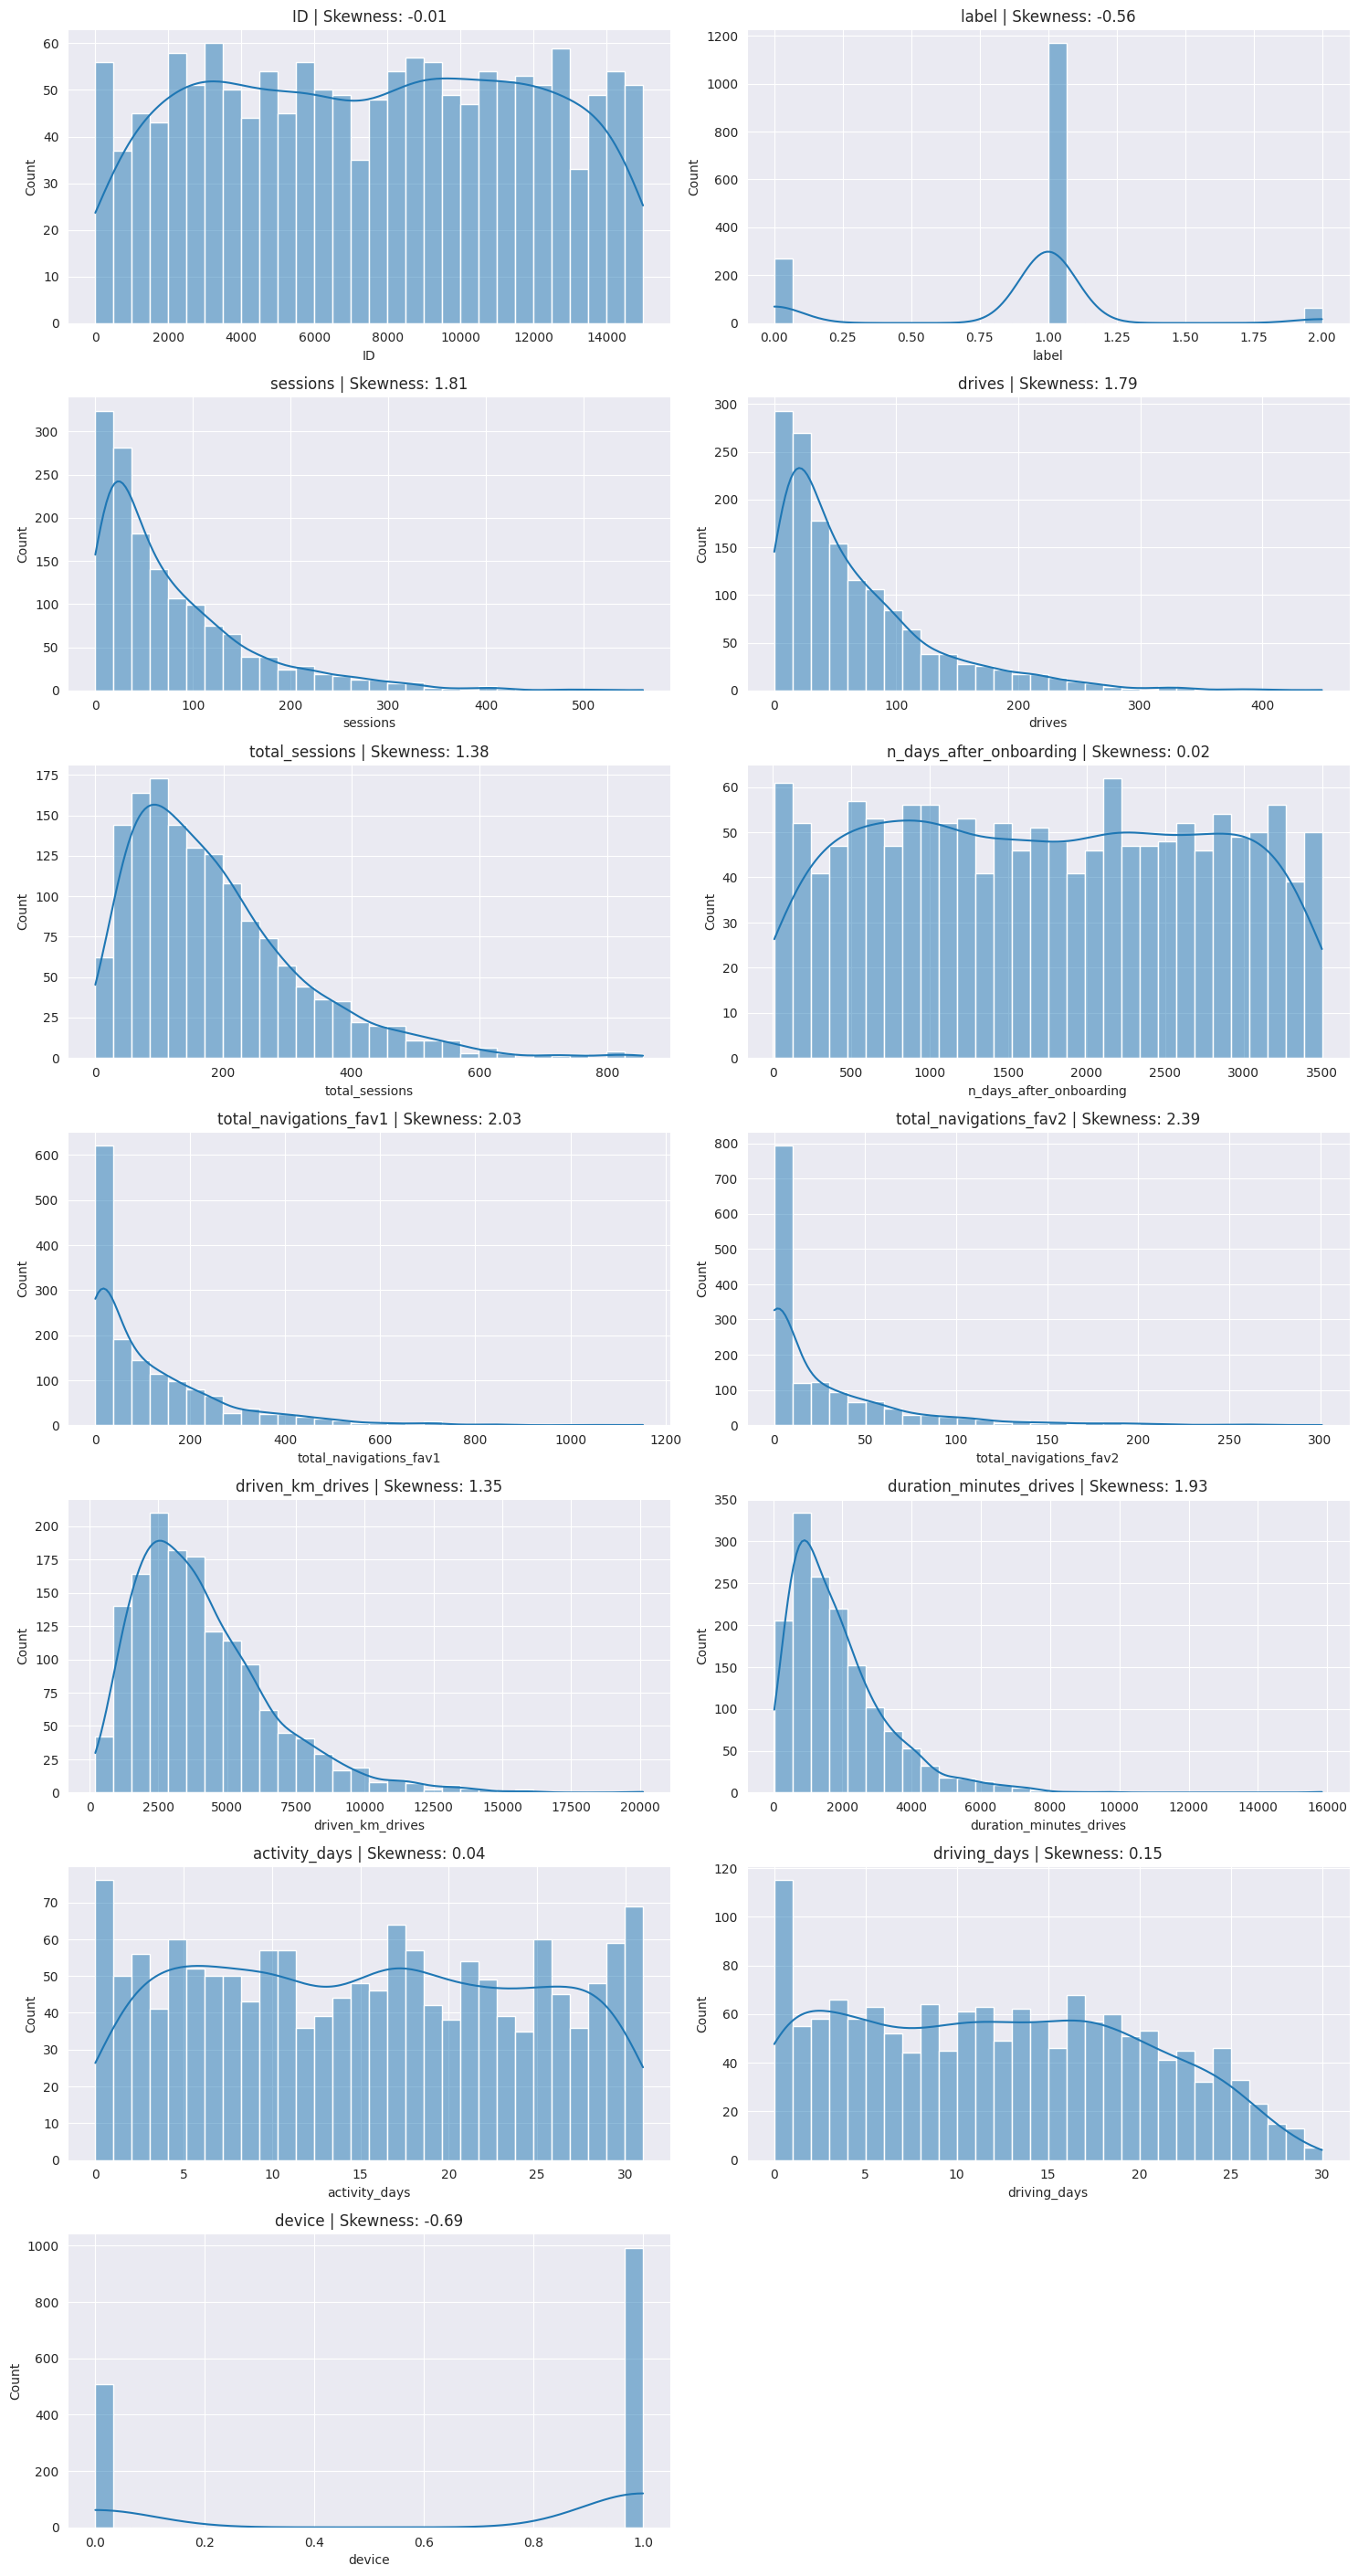

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Sample a subset of the data for faster plotting
sampled_data = data.sample(frac=0.1, random_state=42)

# Plot distribution of each numerical feature
plt.figure(figsize=(15, len(numerical_columns) * 4))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(sampled_data[feature], bins=30, kde=True)
    plt.title(f"{feature} | Skewness: {round(sampled_data[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

<h2><b> User Retention Prediction</b></h2>

Train and Evaluate a Logistic Regressor for User retention

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Target variable for user retention
target_retention = 'label'
y = data[target_retention]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7953333333333333
Precision: 0.7286563627222719
Recall: 0.7953333333333333
F1 Score: 0.7285754661766167


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


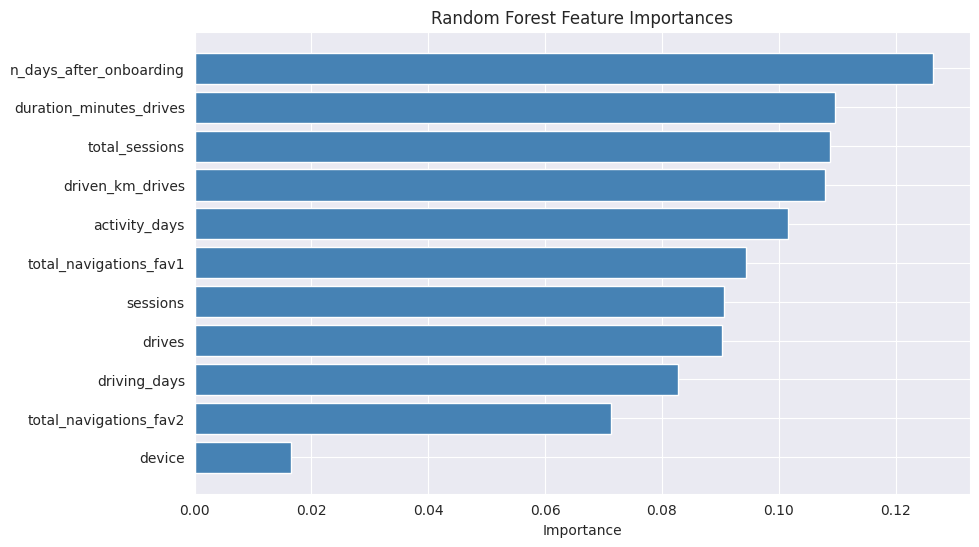

In [29]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()


### <b>Insights from the Random Forest Feature Importance</b>

<b>1. User Activity is Key:</b> Features related to user activity (sessions, drives, total sessions) are the most important predictors of retention. This suggests that more engaged users are more likely to be retained.

<b>2. Driving Metrics Matter:</b> Both the distance driven and the duration of drives are significant factors. This indicates that users who use the service for longer or more frequent trips are more likely to stick with it.

<b>3. Device Differences:</b> The type of device has a moderate impact, which might highlight differences in user experience or behavior based on the platform.

<b>4. Consistency Over Time:</b> While the number of days active and driving days are important, they are less so than total activity metrics, suggesting that overall engagement is more critical than just consistency.

<h2><b> Session Count Prediction</b></h2>

Train and evaluate a Random Forest Regressor for session count Prediction

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Target variable for session count
target_sessions = 'sessions'
y_sessions = data[target_sessions]

# Split the data into training and testing sets
X_train_sessions, X_test_sessions, y_train_sessions, y_test_sessions = train_test_split(X, y_sessions, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_regressor_sessions = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_sessions.fit(X_train_sessions, y_train_sessions)

# Make predictions on the test set
y_pred_sessions = rf_regressor_sessions.predict(X_test_sessions)

# Evaluate the model
mse_sessions = mean_squared_error(y_test_sessions, y_pred_sessions)
mae_sessions = mean_absolute_error(y_test_sessions, y_pred_sessions)
r2_sessions = r2_score(y_test_sessions, y_pred_sessions)

print(f"Mean Squared Error (MSE): {mse_sessions}")
print(f"Mean Absolute Error (MAE): {mae_sessions}")
print(f"R-squared (R²): {r2_sessions}")

Mean Squared Error (MSE): 0.021646133333333494
Mean Absolute Error (MAE): 0.015719999999999942
R-squared (R²): 0.9999965418477911


### <b> Activity and Driving Days Prediction</b>

Train and evaluate a Random Forest Regressor to predict driving days.


In [18]:
# Target variable for activity days
target_activity_days = 'activity_days'
y_activity_days = data[target_activity_days]

# Split the data into training and testing sets
X_train_activity, X_test_activity, y_train_activity, y_test_activity = train_test_split(X, y_activity_days, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_regressor_activity = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_activity.fit(X_train_activity, y_train_activity)

# Make predictions on the test set
y_pred_activity = rf_regressor_activity.predict(X_test_activity)

# Evaluate the model
mse_activity = mean_squared_error(y_test_activity, y_pred_activity)
mae_activity = mean_absolute_error(y_test_activity, y_pred_activity)
r2_activity = r2_score(y_test_activity, y_pred_activity)

print(f"Mean Squared Error (MSE): {mse_activity}")
print(f"Mean Absolute Error (MAE): {mae_activity}")
print(f"R-squared (R²): {r2_activity}")

Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared (R²): 1.0


#### *Random Forest Regegression for Predicting the Distance Driven*

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target variable
X = data[['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
          'total_navigations_fav1', 'total_navigations_fav2',
          'duration_minutes_drives', 'activity_days', 'driving_days', 'device']]
y = data['driven_km_drives']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a random forest regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1407.9582511421063
Mean Squared Error: 3544390.4470774652
R-squared: 0.43011232968801405
